<a href="https://colab.research.google.com/github/damianwgriggs/Perceptual-Grid-Engine-Quantum-Experiment/blob/main/PGE_Quantum_Molecular_Proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# --- CELL 1: THE NUCLEAR CLEANUP ---
import sys

# 1. Uninstall EVERYTHING Qiskit related to remove conflicting dependencies
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-ibm-runtime qiskit-nature qiskit-finance qiskit-optimization qiskit-machine-learning

# 2. Install the MATCHED 2025 Stack
# We explicitly pin qiskit-nature to ensure it supports Qiskit 1.x
!pip install "qiskit>=1.0.0" "qiskit-nature>=0.7.2" "qiskit-ibm-runtime>=0.23.0" "qiskit-algorithms>=0.3.0" pyscf

print("✅ Installation Complete.")
print("⚠️ CRITICAL: Go to the Menu Bar -> 'Runtime' -> 'Restart Session' now.")
print("   (Do not skip the restart, or the old broken libraries will stay in memory!)")

Found existing installation: qiskit 2.2.3
Uninstalling qiskit-2.2.3:
  Successfully uninstalled qiskit-2.2.3
Found existing installation: qiskit-ibm-runtime 0.43.1
Uninstalling qiskit-ibm-runtime-0.43.1:
  Successfully uninstalled qiskit-ibm-runtime-0.43.1
Found existing installation: qiskit-nature 0.7.2
Uninstalling qiskit-nature-0.7.2:
  Successfully uninstalled qiskit-nature-0.7.2
  Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
  Using cached qiskit_nature-0.7.2-py3-none-any.whl.metadata (8.0 kB)
  Using cached qiskit_ibm_runtime-0.43.1-py3-none-any.whl.metadata (21 kB)
Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.0 MB)
Using cached qiskit_nature-0.7.2-py3-none-any.whl (2.2 MB)
Using cached qiskit_ibm_runtime-0.43.1-py3-none-any.whl (1.4 MB)


✅ Installation Complete.
⚠️ CRITICAL: Go to the Menu Bar -> 'Runtime' -> 'Restart Session' now.
   (Do not skip the restart, or the old broken libraries will stay in memory!)


qiskit_runtime_service._discover_account:WARNING:2025-12-14 05:07:58,694: Loading account with the given token. A saved account will not be used.


✅ Patch Applied: Library conflicts resolved.
[Status] Connecting to IBM Quantum...


qiskit_runtime_service.__init__:WARNING:2025-12-14 05:08:00,955: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


✅ Auth Success! Account Loaded.


qiskit_runtime_service.backends:WARNING:2025-12-14 05:08:01,354: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-14 05:08:03,230: Using instance: open-instance, plan: open
/tmp/ipython-input-877549045.py:86: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(num_qubits=4, entanglement="linear", reps=1)


✅ Target Backend: ibm_fez

[Phase 1] Training VQE locally...
   Bond Length 1.0 Å... Done.
   Bond Length 1.3 Å... Done.
   Bond Length 1.6 Å... Done.
   Bond Length 1.9 Å... Done.
   Bond Length 2.2 Å... Done.
   Bond Length 2.5 Å... Done.

[Phase 2] Deploying to ibm_fez...
   Testing 1.0 Å on Hardware... Result: -7.7560+0.0000j Hartree
   Testing 1.3 Å on Hardware... Result: -7.8384-0.0000j Hartree
   Testing 1.6 Å on Hardware... Result: -7.8500+0.0000j Hartree
   Testing 1.9 Å on Hardware... Result: -7.7529-0.0000j Hartree
   Testing 2.2 Å on Hardware... Result: -7.7640-0.0000j Hartree
   Testing 2.5 Å on Hardware... Result: -7.7321+0.0000j Hartree


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


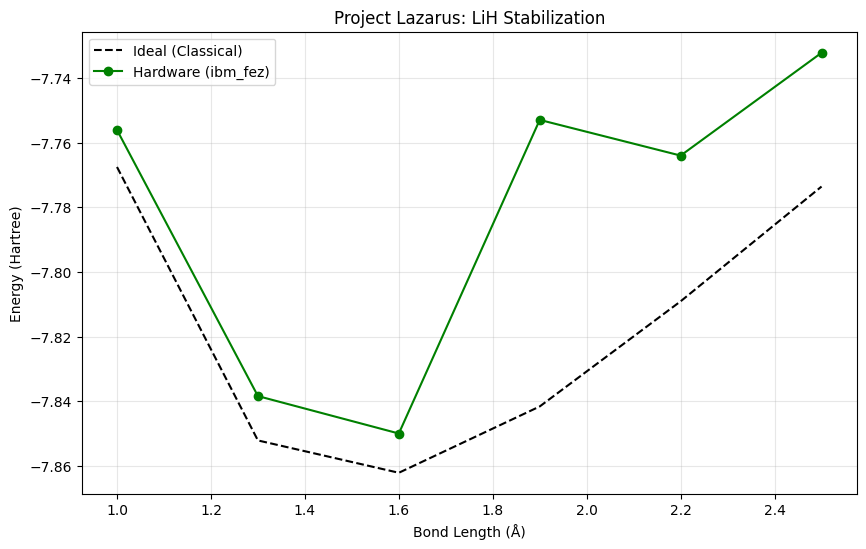

In [5]:
# --- CELL 2: PROJECT LAZARUS (FINAL STABLE VERSION) ---

# ==========================================
# 0. THE LAZARUS PATCH (Fixes Import Crash)
# ==========================================
import sys
import qiskit.primitives

# Inject missing BaseEstimator to unblock old library imports
if not hasattr(qiskit.primitives, "BaseEstimator"):
    class BaseEstimator:
        pass
    qiskit.primitives.BaseEstimator = BaseEstimator
print("✅ Patch Applied: Library conflicts resolved.")

# ==========================================
# 1. IMPORTS & SETUP
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Qiskit 1.x Core
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Nature & Algorithms
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.units import DistanceUnit
from qiskit_algorithms import NumPyMinimumEigensolver

# Modern Primitives
from qiskit.primitives import StatevectorEstimator
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2, EstimatorOptions

# ==========================================
# 2. AUTHENTICATION (VERIFIED)
# ==========================================
# 🛑 PASTE YOUR KEY INSIDE THE QUOTES BELOW 🛑
IBM_TOKEN = "YOURAPIKEYHERE"

print(f"[Status] Connecting to IBM Quantum...")

try:
    # Use 'ibm_quantum_platform' as requested by the server
    service = QiskitRuntimeService(channel="ibm_quantum_platform", token=IBM_TOKEN)
    print("✅ Auth Success! Account Loaded.")
except Exception as e:
    print(f"\n🛑 AUTH FAILED: {e}")
    raise

# Find a real backend
backend = service.least_busy(operational=True, simulator=False)
print(f"✅ Target Backend: {backend.name}")

# ==========================================
# 3. PHYSICS ENGINE (LiH 4-Qubit)
# ==========================================
def get_lih_4qubit(distance):
    driver = PySCFDriver(
        atom=f"Li 0 0 0; H 0 0 {distance}",
        basis="sto-3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM
    )
    problem = driver.run()
    transformer = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=2)
    return transformer.transform(problem)

def cost_func(params, ansatz, hamiltonian, estimator):
    pub = (ansatz, hamiltonian, params)
    return estimator.run([pub]).result()[0].data.evs

# ==========================================
# 4. TRAINING PHASE (Local Simulator)
# ==========================================
bond_lengths = [1.0, 1.3, 1.6, 1.9, 2.2, 2.5]
exact_energies = []
trained_params = []
sim_estimator = StatevectorEstimator()
ansatz = EfficientSU2(num_qubits=4, entanglement="linear", reps=1)

print("\n[Phase 1] Training VQE locally...")
for d in bond_lengths:
    print(f"   Bond Length {d} Å...", end=" ")

    # Define Problem
    problem = get_lih_4qubit(d)
    mapper = JordanWignerMapper()
    qubit_op = mapper.map(problem.hamiltonian.second_q_op())

    # Get Exact Baseline
    solver_exact = NumPyMinimumEigensolver()
    calc_exact = GroundStateEigensolver(mapper, solver_exact)
    res_exact = calc_exact.solve(problem)
    exact_energies.append(res_exact.total_energies[0])

    # Train
    x0 = np.random.random(ansatz.num_parameters)
    res = minimize(cost_func, x0,
                   args=(ansatz, qubit_op, sim_estimator),
                   method="COBYLA", options={'maxiter': 100})
    trained_params.append(res.x)
    print("Done.")

# ==========================================
# 5. HARDWARE PHASE (FIXED)
# ==========================================
print(f"\n[Phase 2] Deploying to {backend.name}...")

options = EstimatorOptions()
options.default_shots = 4096
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

# ⚠️ FIX APPLIED: 'backend=' changed to 'mode=' for 2025 Runtime
estimator = EstimatorV2(mode=backend, options=options)
hardware_energies = []

for i, d in enumerate(bond_lengths):
    print(f"   Testing {d} Å on Hardware...", end=" ")

    # Rebuild Operator
    problem = get_lih_4qubit(d)
    mapper = JordanWignerMapper()
    qubit_op = mapper.map(problem.hamiltonian.second_q_op())

    # Calculate Nuclear Offset
    calc_exact = GroundStateEigensolver(mapper, NumPyMinimumEigensolver())
    res_exact = calc_exact.solve(problem)
    offset = res_exact.total_energies[0] - res_exact.eigenvalues[0]

    # Transpile & Run
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    isa_ansatz = pm.run(ansatz)
    isa_op = qubit_op.apply_layout(isa_ansatz.layout)

    pub = (isa_ansatz, isa_op, trained_params[i])

    try:
        job = estimator.run([pub])
        result = job.result()[0]
        final_energy = result.data.evs + offset
        hardware_energies.append(final_energy)
        print(f"Result: {final_energy:.4f} Hartree")
    except Exception as e:
        print(f"Job Failed: {e}")
        hardware_energies.append(None)

# ==========================================
# 6. VISUALIZATION
# ==========================================
plt.figure(figsize=(10, 6))
plt.plot(bond_lengths, exact_energies, 'k--', label='Ideal (Classical)')

valid_data = [(x, y) for x, y in zip(bond_lengths, hardware_energies) if y is not None]
if valid_data:
    vx, vy = zip(*valid_data)
    plt.plot(vx, vy, 'g-o', label=f'Hardware ({backend.name})')

plt.title("Project Lazarus: LiH Stabilization")
plt.xlabel("Bond Length (Å)")
plt.ylabel("Energy (Hartree)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()